# Google Sentiment Analysis

Thisn notebook is use to explore the data that we have collected from twitter using tweepy package. It comprises the data cleaning and basic data exploration .Also tested with textBlob and Vader for calculate the polarity of tweets in order to determine the tweets are positive, negative or neutral sentiments.

## Install Required Packages 

In [ ]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install langdetect
#pip install wordcloud

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Authentication
# Run this code only for to scrap tweetts directly from here 
consumer_key = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sojasingarayar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
#Sentiment Analysis
#Import existing dataset

def percentage(part,whole):
    return 100 * float(part)/float(whole) 
# Importing dataset
df=pd.read_csv('/Users/sojasingarayar/Documents/Projet-Interne-IBMI/Sentiment_Analysis/BasicScraper/Google-tweets.csv') 
tweets = list(df['Text'])

noOfTweet = df.shape[0]

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    #tweet_list.append(tweet.text)
    #analysis = TextBlob(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
#Importing directly
#Sentiment Analysis

"""def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.user_timeline, q=keyword).items(noOfTweet)


positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    #tweet_list.append(tweet.text)
    #analysis = TextBlob(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')"""

### Number of Tweets (Total, Positive, Negative, Neutral) 

In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  3250
positive number:  1706
negative number:  183
neutral number:  1361


In [5]:
tweet_list

,0
0,@MekaniPing Hi Berke. Without revealing your e...
1,@alami_mariem Hi Mariem. Let's see what we can...
2,"@iBESTLIAMSTAN Ah, it may not be working. Are ..."
3,"@knowjis325 Hi, Rie. Thanks for your review! I..."
4,"@vSnowkeo Mind if we jump in? Just to confirm,..."
...,...
3245,"@SnehalAmitjoshi Hi, Snehal. Mind if we jump i..."
3246,"@tejas_shekar Hi, Tejas. Mind if we jump in? T..."
3247,"@zachmauch Hi, Zach. We're sorry to hear that...."
3248,"A Halloween treat, from us to you: Use Google ..."


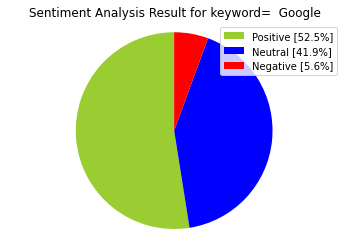

In [6]:
#Creating PieCart
keyword = 'Google'
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

## Data Preprocessing

In [7]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [8]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
del tw_list[0]
tw_list

,text
0,@MekaniPing Hi Berke. Without revealing your e...
1,@alami_mariem Hi Mariem. Let's see what we can...
2,"@iBESTLIAMSTAN Ah, it may not be working. Are ..."
3,"@knowjis325 Hi, Rie. Thanks for your review! I..."
4,"@vSnowkeo Mind if we jump in? Just to confirm,..."
...,...
3245,"@SnehalAmitjoshi Hi, Snehal. Mind if we jump i..."
3246,"@tejas_shekar Hi, Tejas. Mind if we jump in? T..."
3247,"@zachmauch Hi, Zach. We're sorry to hear that...."
3248,"A Halloween treat, from us to you: Use Google ..."


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list['text'] = tw_list['text'].str.replace('hi ', '')
tw_list.head(10)

,text
0,berke without revealing your email address ...
1,mariem mariem let s see what we can do to h...
2,ah it may not be working are you following...
3,rie thanks for your review in order to he...
4,mind if we jump in just to confirm are you...
5,prince let s see what we can do to help lo...
6,hmm is this a google workspace account end...
7,krishna let s see what we can do to help l...
8,verse sumit let s see what we can do to hel...
9,kuldeep are you getting a specific error me...


## Sentiment Analysis
Calculating Polarity of sentence using TextBlob

Calculating Negative, Positive, Neutral and Compound values in Nltk Vader (Valence Aware Dictionary and sEntiment Reasoner) is a rule/lexicon-based, open-source sentiment analyzer pre-built library).

In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule/lexicon-based, open-source sentiment analyzer pre-built library.
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,berke without revealing your email address ...,0.500,0.500,neutral,0.000,1.000,0.000,0.0000
1,mariem mariem let s see what we can do to h...,0.000,0.000,positive,0.000,0.856,0.144,0.4019
2,ah it may not be working are you following...,0.000,0.100,neutral,0.000,1.000,0.000,0.0000
3,rie thanks for your review in order to he...,0.100,0.350,positive,0.000,0.752,0.248,0.6808
4,mind if we jump in just to confirm are you...,0.500,0.625,neutral,0.000,1.000,0.000,0.0000
5,prince let s see what we can do to help lo...,0.000,0.000,positive,0.000,0.847,0.153,0.4019
6,hmm is this a google workspace account end...,-0.125,0.375,neutral,0.000,1.000,0.000,0.0000
7,krishna let s see what we can do to help l...,0.000,0.000,positive,0.000,0.847,0.153,0.4019
8,verse sumit let s see what we can do to hel...,0.000,0.000,positive,0.000,0.856,0.144,0.4019
9,kuldeep are you getting a specific error me...,0.000,0.125,negative,0.184,0.816,0.000,-0.4019


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
pc = count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
positive,1726,53.30
neutral,1325,40.92
negative,187,5.78


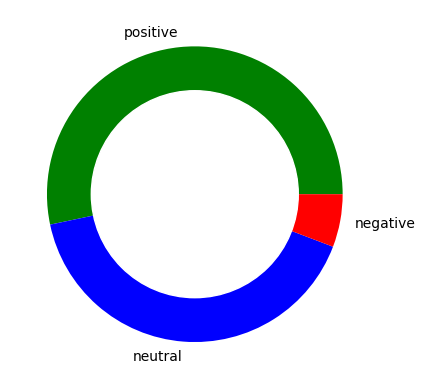

In [16]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## WordCloud

* wordcloud for overall tweets
* wordcloud for postive tweets 
* wordcloud for negative tweets 
* wordcloud for neutral tweets 

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    #STOPWORDS =  set(stopwords.words('english'))
    SW = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  
                  max_words=3000,
                  stopwords=SW,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


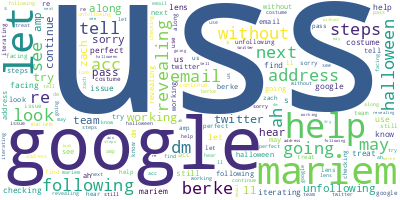

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


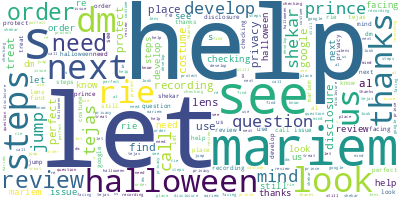

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


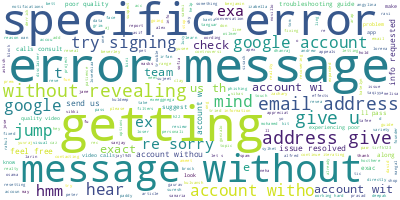

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


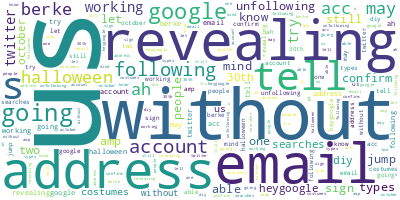

In [21]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

### Data Exploration
Calculating tweet's lenght and word count oin order to visualize the frequent word in tweets and count words per tweets

In [22]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [23]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,104.01
neutral,95.83
positive,101.16


In [24]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.01
neutral,16.10
positive,20.11


### Data Cleaning and preparation

1. Removing Punctuation
2. Appliyng tokenization
3.  Removing stopwords
4. Appliyng Stemmer
5. Cleaning Text to remove puntuation and remove stopwords
6. Appliyng Countvectorizer to count total unique words present in dataset

In [25]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [26]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [27]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [28]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [29]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [30]:
tw_list.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,berke without revealing your email address ...,0.5,0.500,neutral,0.0,1.000,0.000,0.0000,105,18,berke without revealing your email address ...,"[, berke, without, revealing, your, email, add...","[, berke, without, revealing, email, address, ...","[, berk, without, reveal, email, address, tell..."
1,mariem mariem let s see what we can do to h...,0.0,0.000,positive,0.0,0.856,0.144,0.4019,85,19,mariem mariem let s see what we can do to h...,"[, mariem, mariem, let, s, see, what, we, can,...","[, mariem, mariem, let, see, help, look, dm, n...","[, mariem, mariem, let, see, help, look, dm, n..."
2,ah it may not be working are you following...,0.0,0.100,neutral,0.0,1.000,0.000,0.0000,102,16,ah it may not be working are you following...,"[, ah, it, may, not, be, working, are, you, fo...","[, ah, may, working, following, twitter, try, ...","[, ah, may, work, follow, twitter, tri, unfoll..."
3,rie thanks for your review in order to he...,0.1,0.350,positive,0.0,0.752,0.248,0.6808,105,19,rie thanks for your review in order to he...,"[, rie, thanks, for, your, review, in, order, ...","[, rie, thanks, review, order, help, need, dev...","[, rie, thank, review, order, help, need, deve..."
4,mind if we jump in just to confirm are you...,0.5,0.625,neutral,0.0,1.000,0.000,0.0000,104,21,mind if we jump in just to confirm are you...,"[, mind, if, we, jump, in, just, to, confirm, ...","[, mind, jump, confirm, still, able, sign, goo...","[, mind, jump, confirm, still, abl, sign, goog..."


In [31]:
tw_list['text'][0]

'  berke  without revealing your email address  tell us more about what s going on with your google acc   '

In [32]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

3238 Number of reviews has 2450 words


In [33]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aadarsh,aadi,aaftab,aakash,aam,aamit,aand,aarav,aaron,...,zachjohn,zadranian,zaiah,zakaria,zandra,zealous,zizipo,zoell,zone,zuni
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualization - Word frequency 

For unigram, bigrams and triggrams

In [34]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
us,1944
let,1494
step,1480
know,996
tri,974
help,953
account,948
dm,848
pleas,722
googl,683


In [35]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
#n&_bigram
n1_unigrams = get_top_n_gram(tw_list['text'],(1,1),20)

n1_unigrams

[('let', 1480),
 ('steps', 1258),
 ('know', 996),
 ('account', 941),
 ('dm', 848),
 ('help', 846),
 ('google', 680),
 ('follow', 651),
 ('try', 519),
 ('tried', 454),
 ('recovering', 453),
 ('using', 428),
 ('just', 424),
 ('like', 405),
 ('confirm', 394),
 ('conversation', 381),
 ('look', 379),
 ('share', 309),
 ('hmm', 298),
 ('completing', 292)]

In [37]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('let know', 916),
 ('follow let', 628),
 ('let help', 537),
 ('tried recovering', 446),
 ('google account', 433),
 ('just confirm', 384),
 ('like conversation', 378),
 ('conversation dm', 378),
 ('dm follow', 378),
 ('dm steps', 311),
 ('help look', 310),
 ('look dm', 310),
 ('account using', 308),
 ('using steps', 305),
 ('know share', 304),
 ('share steps', 304),
 ('completing steps', 288),
 ('recovering account', 281),
 ('help follow', 252),
 ('revealing email', 234)]

In [38]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('follow let know', 625),
 ('like conversation dm', 378),
 ('conversation dm follow', 378),
 ('dm follow let', 378),
 ('let help look', 310),
 ('help look dm', 310),
 ('look dm steps', 310),
 ('account using steps', 305),
 ('let know share', 304),
 ('know share steps', 304),
 ('tried recovering account', 281),
 ('help follow let', 239),
 ('revealing email address', 234),
 ('let help follow', 227),
 ('confirm able sign', 216),
 ('just confirm able', 213),
 ('account let know', 190),
 ('tried recovering google', 164),
 ('recovering google account', 164),
 ('able sign google', 159)]

In [39]:
def plot_word_frequency(top20):
    plt.bar(range(len(top20)), [val[1] for val in top20], align='center')
    plt.xticks(range(len(top20)), [val[0] for val in top20])
    plt.xticks(rotation=70)
    plt.show()

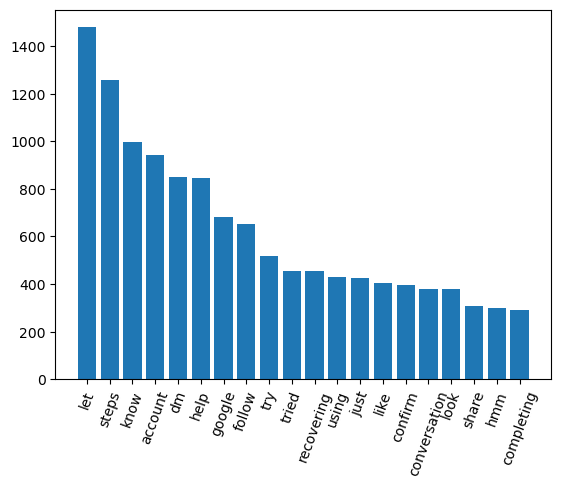

In [40]:
plot_word_frequency(n1_unigrams)

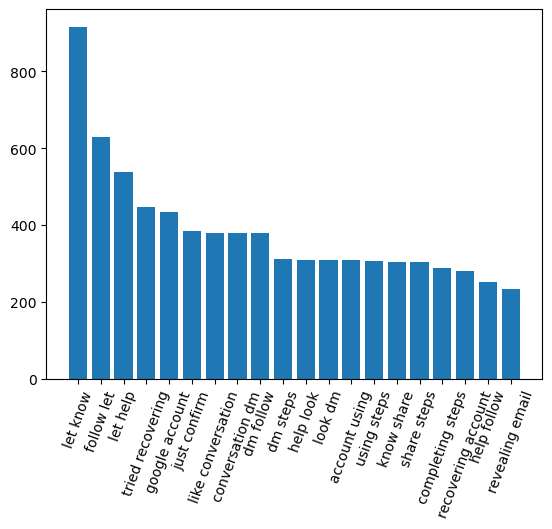

In [41]:
plot_word_frequency(n2_bigrams)

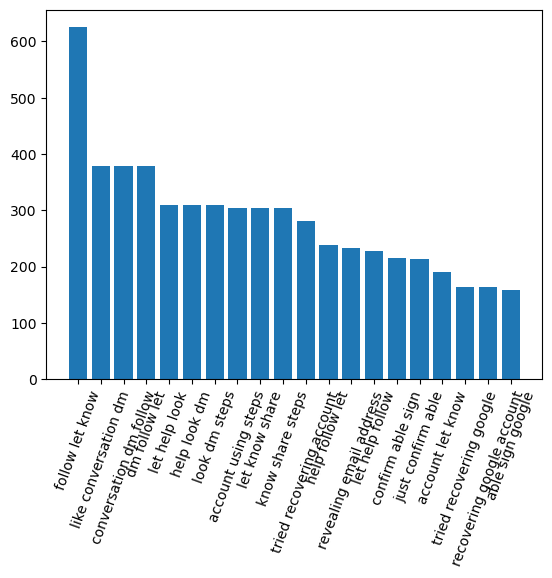

In [42]:
plot_word_frequency(n3_trigrams)

In [43]:
tw_list.shape[0]

3238